In [1]:
import numpy as np
import stochasticTN as stn
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.linalg import eigs, eigsh

# Network $\epsilon$-SIS model

Examples of steady state network $\epsilon$-SIS computations using MPS and DMRG. First let's run the basic algorithm for a small randomly generated network using the Barabasi-Albert algorithm.

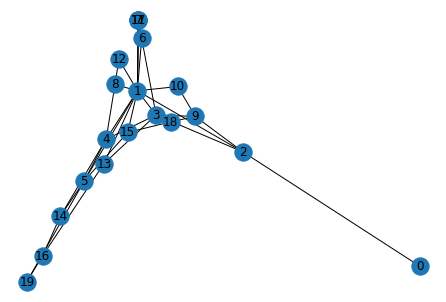

In [2]:
# Create a network using `NetworkX`
n =20 # number of nodes 
G = nx.barabasi_albert_graph(n,2)
pos = nx.spectral_layout(G)
nx.draw(G, pos= pos, with_labels = True)

In [3]:
# Find good ordering of nodes according to Fiedler vector
perm = stn.find_permutation(nx.laplacian_matrix(G).astype('float'))
A = nx.adjacency_matrix(G).toarray()
Aordered = A[perm][:,perm]

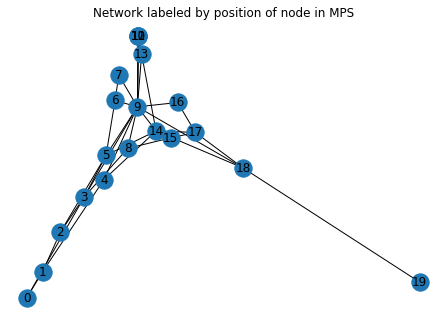

In [4]:
nx.draw(G, pos = pos, labels = {perm[i]: i for i in range(n)})
plt.title("Network labeled by position of node in MPS")
plt.show()

## DMRG method for steady state

In [5]:
# Set parameters:
lam = 0.6
epsilon = 1e-2

# Define MPO
mpo = stn.network_SIS(Aordered,lam, 0, epsilon)
print("MPO bond dimensions : ", mpo.bond_dimensions)

#Initialize random MPS
mps = stn.randomMPS(n, 40)

#initialize the dmrg routine
dmrg = stn.DMRG(mps, mpo, np.ones((1,1,1)),np.ones((1,1,1)))

#run DMRG 
dens, var, err, converged = dmrg.run_double_site_dmrg(MaxSweeps=50, cutoff=1e-8, Dmax=250, verbose=True)


MPO bond dimensions :  [1, 4, 7, 10, 12, 13, 15, 18, 21, 23, 26, 29, 32, 35, 35, 35, 31, 8, 6, 4, 1]
VarMPS sites=(0,1)/20: optimized E=6.705950378439141e-08, D = 2,  truncated SVs = 0   216799687781287e-08     
r = 0.600000,   n_s =  3,   dens = 0.437916515,   var = 0.035689161   tps = 39.19s   <D>= 61.68   maxD = 168


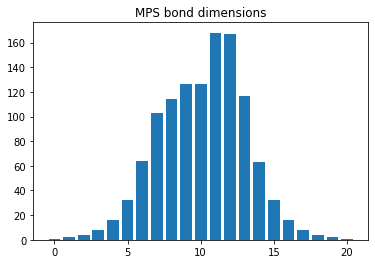

In [8]:
plt.bar([i for i in range(n+1)],mps.bond_dimensions)
plt.title("MPS bond dimensions")
plt.show()

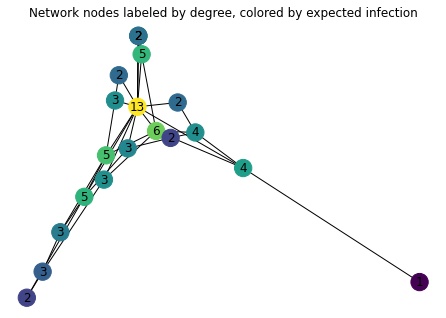

In [9]:
expectationValues = np.array([stn.single_site_occupancy(mps, i) for i in range(n)])
invPerm = np.argsort(perm)

nx.draw(G, pos, node_color = expectationValues[invPerm], labels = {i: G.degree[i] for i in range(n)})
plt.title("Network nodes labeled by degree, colored by expected infection")
plt.show()